In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
from utils import Data, Say
from load import Load
import pandas as pd

import resume 

say = Say()
load = Load(path="in")
data = Data(path="in")
try:
    labels = data.get_labels(path="in")
    data_dict = load.load_datasets_from_csv(path="in")
except ValueError:
    say.cow_says_error('Error al cargar base de datos')

data_dict = resume.dataset_date_iter(data_dict, labels)


 _____________________________________________________ 
< Clientes do not have [Fecha, Fecha_Entrega] columns > 
 ----------------------------------------------------- 
        \   ^__^ 
         \  (oo)\_______ 
            (__)\  error )\/\ 
                ||----w | 
                ||     || 
 ______________________________________ 
< Se cambio la columna Fecha en Compra > 
 -------------------------------------- 
        \   ^__^ 
         \  (oo)\_______ 
            (__)\  good )\/\ 
                ||----w | 
                ||     || 
 _____________________________________ 
< Se cambio la columna Fecha en Gasto > 
 ------------------------------------- 
        \   ^__^ 
         \  (oo)\_______ 
            (__)\  good )\/\ 
                ||----w | 
                ||     || 
 ________________________________________________________ 
< Localidades do not have [Fecha, Fecha_Entrega] columns > 
 -------------------------------------------------------- 
        \   ^__^ 
     

In [231]:
# valores nulos
df_venta = data_dict['Venta'] 
df_venta


,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
0,1,2018-03-09,2018-03-17,3,969,13,1674,42817,813.12,2.0
1,2,2018-12-28,2018-12-29,2,884,13,1674,42795,543.18,3.0
2,3,2016-03-28,2016-03-31,2,1722,13,1674,42837,430.32,1.0
3,4,2017-10-23,2017-10-24,3,2876,13,1674,42834,818.84,2.0
4,5,2017-11-22,2017-11-25,2,678,13,1674,42825,554.18,3.0
...,...,...,...,...,...,...,...,...,...,...
46175,47596,2020-11-30,2020-12-09,1,193,26,3032,42850,279.00,2.0
46176,47597,2020-11-30,2020-12-07,3,333,26,3193,42799,1536.04,2.0
46177,47598,2020-11-30,2020-12-07,1,2389,27,3667,42916,1356.00,2.0
46178,47599,2020-11-30,2020-12-04,1,1067,29,3836,42935,2456.00,1.0


In [272]:
def null_review(dataframe):
    null_serie = dataframe.isnull().sum()
    null_serie = null_serie[null_serie != 0]
    return null_serie

def null_percentage(dataframe):
    null_serie = null_review(dataframe)
    total = dataframe.shape[0]
    null_dict = {}
    for i in range(null_serie.size):
        percent = round(null_serie.values[i]*100/total,2)
        null_dict[null_serie.index[i]] = percent

    return null_dict

In [273]:
null_percentage(df_venta)

{'Precio': 1.99, 'Cantidad': 1.91}

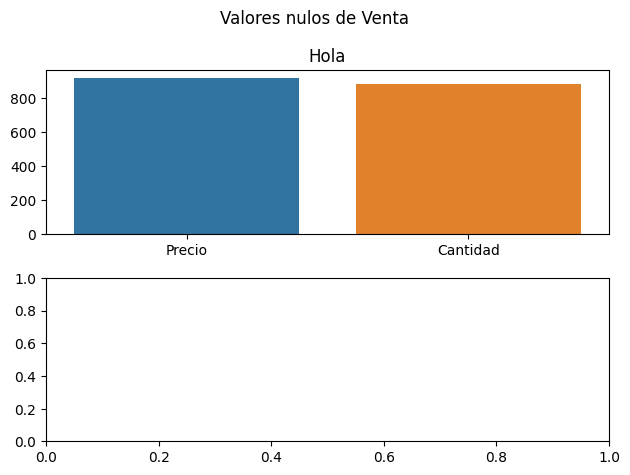

In [207]:
null, axs = plt.subplots(2,1)
null.suptitle(f'Valores nulos de {labels[-1]}')
axs[0].set_title('Hola')
sns.barplot(ax=axs[0],x=dt.index,y=dt.values)
plt.tight_layout()
plt.show()

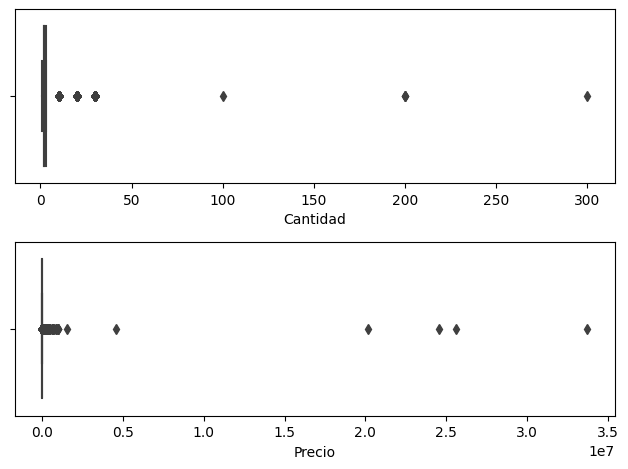

In [188]:
# valores atípicos.

boxplot, axs = plt.subplots(2,1)
sns.boxplot(ax = axs[0] ,data = df_venta, x=df_venta.Cantidad)
sns.boxplot(ax = axs[1], data = df_venta, x=df_venta.Precio)
plt.tight_layout()
plt.show()

In [189]:
def resume_visual(dataframe):
    null_serie = dataframe.isnull().sum()
    null_serie = dataframe[dataframe != 0]

    fig, axs = plt.subplots(null_serie.size,1)
    axs[0].set_title('Valores nulos')
    sns.barplot(ax=axs[0],x = null_serie.index, y=null_serie.values)
    plt.tight_layout()
    
    return plt.show()

    
    

In [197]:
def find_id(columns_name : str) -> bool:
    return ('Id' in columns_name) or ('ID' in columns_name)

In [191]:
def id_to_int(dataframe):
    cols = list(dataframe.columns)
    for col in cols:
        if find_id(col):
            dataframe[col].apply(int)

    return dataframe

In [192]:
def id_to_int_iter(data_dict, labels):
    for label in labels:
        data_dict[label]=id_to_int(data_dict[label])
    return data_dict
    

In [200]:
id_to_int_iter(data_dict, labels)

{'Clientes':         ID     Provincia        Nombre_y_Apellido  \
 0        1  Buenos Aires       HEBER JONI SANTANA   
 1        2  Buenos Aires              ANA SAPRIZA   
 2        3  Buenos Aires  FERNANDO LUIS SARALEGUI   
 3        4  Buenos Aires         MANUELA SARASOLA   
 4        5  Buenos Aires      MARIO RAÃL SARASUA   
 ...    ...           ...                      ...   
 2379  2668      CÃ³rdoba       MARIA STELLA RIVAS   
 2380  2669      CÃ³rdoba       ANA GABRIELA RIVAS   
 2381  2670      CÃ³rdoba    JAVIER ALONSO RIVEIRO   
 2382  2671      CÃ³rdoba    JUAN MANUEL RODRIGUEZ   
 2383  2672      CÃ³rdoba    JULIO CESAR RODRIGUEZ   
 
                                               Domicilio   Telefono  Edad  \
 0     LAS HERAS Y BAT. 24 DE FEBRERO 4150  RINCON DE...    42-5161  58.0   
 1     PUEYRREDON Y DUPUY RUTA3 KM 52.500 S/N  BÃÂº ...    49-7578  61.0   
 2                              CALDERON DE LA BARCA 498    49-3435  15.0   
 3                    RUTA 36 